In [7]:
from crypt_currency.api import Api
from IPython.display import clear_output
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import time

In [8]:
def get_local_min(array):
    index = argrelextrema(array, np.less)[0]
    return index
def get_local_max(array):
    index = argrelextrema(array, np.greater)[0]
    return index

In [11]:
def exec(api):
    clear_output(wait = True)
    # 売り買い指数
    buy_indicator = 0
    sell_indicator = 0

    # 1時間分のBitcoinの値を取得（1分足）
    val_df = api.get_price(period=60, plt_show=True)
    # 終値でプロット
    plt.plot(val_df["close"], "k", label="closing")
    # 移動平均でプロット
    moving_average = val_df["close"].rolling(window=5).mean()
    plt.plot(moving_average, "b", label="moving avg")
    # 極大値
    local_maxs = get_local_max(np.array(moving_average))
    for local_max in local_maxs:
        if local_max>55:
            sell_indicator += 1
        plt.vlines(local_max, val_df["close"].min(), val_df["close"].max(), "green", linestyles="dashed")
    # 極小値
    local_mins = get_local_min(np.array(moving_average))
    for local_min in local_mins:
        if local_min>55:
            buy_indicator += 1
        plt.vlines(local_min, val_df["close"].min(), val_df["close"].max(), "red", linestyles="dashed")
    # 結果
    if buy_indicator == sell_indicator:
        plt.vlines(55, val_df["close"].min(), val_df["close"].max(), "yellow", label="DRAW")
    elif buy_indicator > sell_indicator:
        plt.vlines(55, val_df["close"].min(), val_df["close"].max(), "yellow", label="BUY")
    else:
        plt.vlines(55, val_df["close"].min(), val_df["close"].max(), "yellow", label="SELL")
    plt.legend()
    plt.show()

    # 数値勾配
    grad = np.gradient(moving_average)
    plt.plot(grad, "k", label="grad")
    plt.plot([0 for _ in range(len(grad))], "b", label="threshold")
    plt.legend()
    plt.show()

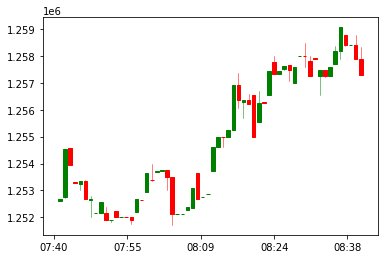

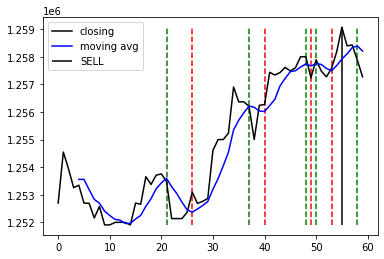

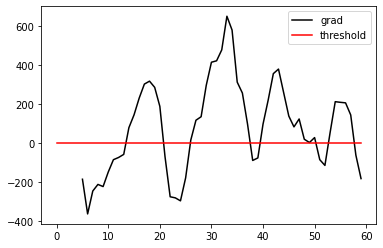

KeyboardInterrupt: 

In [10]:
api = Api()
while True:
    exec(api)
    time.sleep(60)